In [1]:
setwd('/Users/alexis/IEHS Dropbox/Rager Lab/Alexis_Payton/1_Compartment_Analysis/Expt1.1_DescriptiveStats/Input')
Output = ('/Users/alexis/IEHS Dropbox/Rager Lab/Alexis_Payton/1_Compartment_Analysis/Expt1.1_DescriptiveStats/Output')

library("readxl")
library(tidyverse)
library(reshape2)
library(ggrepel)

#reading in file
data <- read_excel("CytokineData_102920.xlsx", sheet = 2)
data_df = data.frame(data)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




# Simulation

Simulating or choosing 500 random concentrations from each compartment and running spearman correlation tests to see if correlation between compartments persists given random noise. 

In [62]:
#finding average protein concentration by compartment for non-smokers only
NLF_conc = data_df %>% 
    filter(Compartment == 'NLF', Group == 'NS') %>%
    group_by(Protein) %>%
    summarize(mean = mean(Conc_pslog2))
ELF_conc = data_df %>% 
    filter(Compartment == 'ELF', Group == 'NS') %>%
    group_by(Protein) %>%
    summarize(mean = mean(Conc_pslog2))
Sputum_conc = data_df %>% 
    filter(Compartment == 'Sputum', Group == 'NS') %>%
    group_by(Protein) %>%
    summarize(mean = mean(Conc_pslog2))
Serum_conc = data_df %>% 
    filter(Compartment == 'Serum', Group == 'NS') %>%
    group_by(Protein) %>%
    summarize(mean = mean(Conc_pslog2))

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



In [63]:
#size indicates length of vector, replace prevents duplicate values
NLF_random_samples = sample(NLF_conc$mean, size = 500, replace = TRUE)
ELF_random_samples = sample(ELF_conc$mean, size = 500, replace = TRUE)
Sputum_random_samples = sample(Sputum_conc$mean, size = 500, replace = TRUE)
Serum_random_samples = sample(Serum_conc$mean, size = 500, replace = TRUE)

# Spearman Correlations

In [64]:
get_spearman_values = function(concentrations_comp1, concentrations_comp2){
    spearman_test = cor.test(concentrations_comp1, concentrations_comp2, method = c('spearman'))
    coeff = spearman_test$estimate
    pvalue = spearman_test$p.value
    value_tuple = c(coeff, pvalue)
    return(value_tuple)
}

#real data 
NLF_ELF_tuple_real = get_spearman_values(NLF_conc$mean, ELF_conc$mean)
NLF_Sputum_tuple_real = get_spearman_values(NLF_conc$mean, Sputum_conc$mean)
NLF_Serum_tuple_real = get_spearman_values(NLF_conc$mean, Serum_conc$mean)
ELF_Serum_tuple_real = get_spearman_values(ELF_conc$mean, Serum_conc$mean)
ELF_Sputum_tuple_real = get_spearman_values(ELF_conc$mean, Sputum_conc$mean)
Sputum_Serum_tuple_real = get_spearman_values(Sputum_conc$mean, Serum_conc$mean)

#simulated data
NLF_ELF_tuple_simulated = get_spearman_values(NLF_random_samples, ELF_random_samples)
NLF_Sputum_tuple_simulated = get_spearman_values(NLF_random_samples, Sputum_random_samples)
NLF_Serum_tuple_simulated = get_spearman_values(NLF_random_samples, Serum_random_samples)
ELF_Serum_tuple_simulated = get_spearman_values(ELF_random_samples, Serum_random_samples)
ELF_Sputum_tuple_simulated = get_spearman_values(ELF_random_samples, Sputum_random_samples)
Sputum_Serum_tuple_simulated = get_spearman_values(Sputum_random_samples, Serum_random_samples)

#real and simulated

Warning message in cor.test.default(concentrations_comp1, concentrations_comp2, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(concentrations_comp1, concentrations_comp2, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(concentrations_comp1, concentrations_comp2, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(concentrations_comp1, concentrations_comp2, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(concentrations_comp1, concentrations_comp2, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(concentrations_comp1, concentrations_comp2, :
“Cannot compute exact p-value with ties”


In [91]:
#version 1 (v1 has the first df as real and the second simulated vice versa for v2)
NLF_ELF_tuple_bothv1 = get_spearman_values(NLF_conc, ELF_random_samples)
NLF_Sputum_tuple_bothv1 = get_spearman_values(NLF_conc, Sputum_random_samples)
NLF_Serum_tuple_bothv1 = get_spearman_values(NLF_conc, Serum_random_samples)
ELF_Serum_tuple_bothv1 = get_spearman_values(ELF_conc, Serum_random_samples)
ELF_Sputum_tuple_bothv1 = get_spearman_values(ELF_conc, Sputum_random_samples)
Sputum_Serum_tuple_bothv1 = get_spearman_values(Sputum_conc, Serum_random_samples)

NLF_ELF_tuple_bothv2 = get_spearman_values(NLF_random_samples, ELF_conc)
NLF_Sputum_tuple_bothv2 = get_spearman_values(NLF_random_samples, Sputum_conc)
NLF_Serum_tuple_bothv2 = get_spearman_values(NLF_random_samples, Serum_conc)
ELF_Serum_tuple_bothv2 = get_spearman_values(ELF_random_samples, Serum_conc)
ELF_Sputum_tuple_bothv2 = get_spearman_values(ELF_random_samples, Sputum_conc)
Sputum_Serum_tuple_bothv2 = get_spearman_values(Sputum_random_samples, Serum_conc)

ERROR: Error in cor.test.default(concentrations_comp1, concentrations_comp2, : 'x' and 'y' must have the same length


In [78]:
# creating table w/ comparisons as rows and 3 col: coeff, p value, real or simulated data
table_summary = function(tuple1, tuple2, tuple3, tuple4, tuple5, tuple6, data_type){
    table_initial = rbind(tuple1, tuple2, tuple3, tuple4, tuple5, tuple6)
    data_type_vector = rep(data_type, times = length(table_initial[,1]))
    spearman_table = cbind(table_initial, data_type_vector)
    colnames(spearman_table) = c('Spearman_Coefficient', 'P_Value', 'Data_Type')
    rownames(spearman_table) = c('NLF_ELF', 'NLF_Sputum','NLF_Serum','ELF_Sputum','ELF_Serum','Sputum_Serum')
    return(spearman_table)
}

real_correlations = table_summary(NLF_ELF_tuple_real, NLF_Sputum_tuple_real, NLF_Serum_tuple_real, ELF_Serum_tuple_real, 
             ELF_Sputum_tuple_real, Sputum_Serum_tuple_real, 'Real')
simulated_correlations = table_summary(NLF_ELF_tuple_simulated, NLF_Sputum_tuple_simulated, NLF_Serum_tuple_simulated, ELF_Serum_tuple_simulated, 
             ELF_Sputum_tuple_simulated, Sputum_Serum_tuple_simulated, 'Simulated')

final_correlation_table = data.frame(rbind(real_correlations, simulated_correlations))
#making coefficients and p values numeric
final_correlation_table$Spearman_Coefficient = as.numeric(final_correlation_table$Spearman_Coefficient)
final_correlation_table$P_Value = as.numeric(final_correlation_table$P_Value)

In [79]:
final_correlation_table

,Spearman_Coefficient,P_Value,Data_Type
,<dbl>,<dbl>,<chr>
NLF_ELF,0.96837945,3.501975e-06,Real
NLF_Sputum,0.87916431,2.472468e-06,Real
NLF_Serum,0.73461321,1.507782e-04,Real
ELF_Sputum,0.71654433,2.612617e-04,Real
ELF_Serum,0.92320723,4.079671e-06,Real
Sputum_Serum,0.71767363,2.528313e-04,Real
NLF_ELF.1,0.07583958,9.026141e-02,Simulated
NLF_Sputum.1,-0.00355028,9.368829e-01,Simulated
NLF_Serum.1,0.01191933,7.903418e-01,Simulated


# Plot

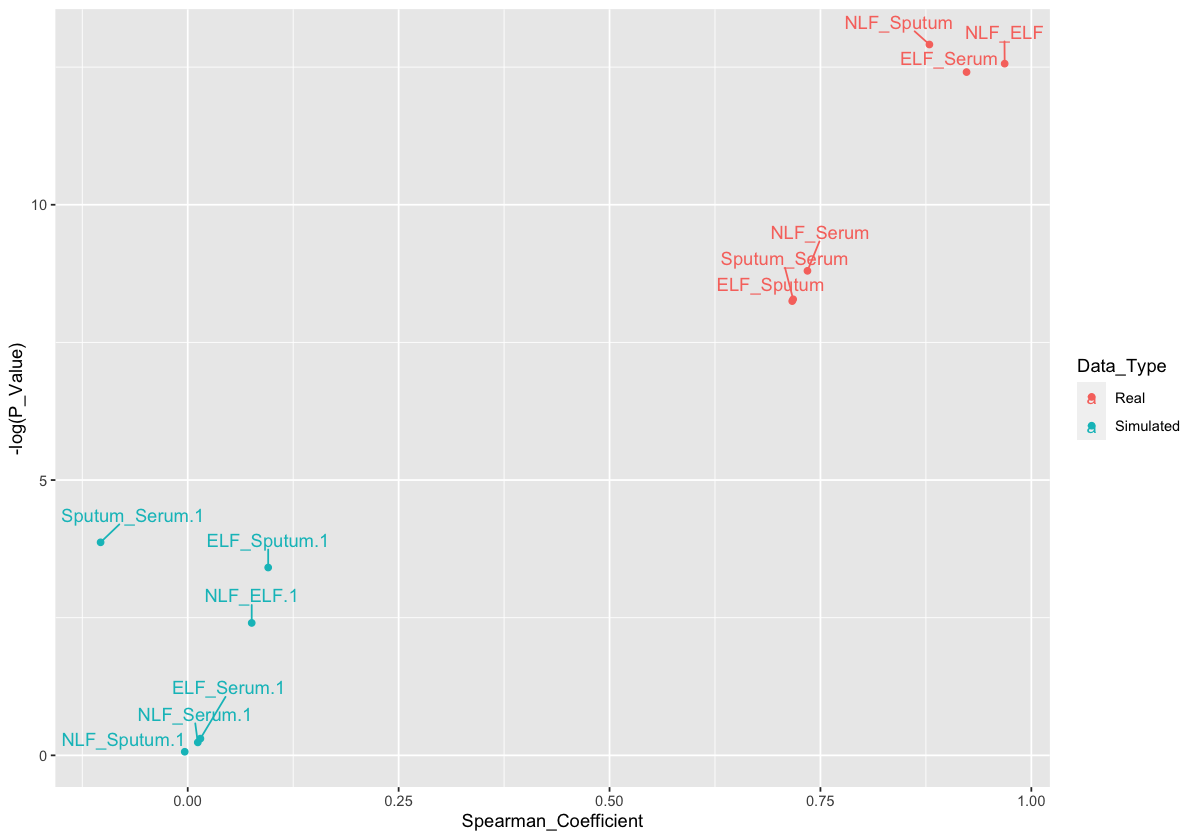

In [90]:
options(repr.plot.width= 10, repr.plot.height= 7) #changing size
ggplot(data = final_correlation_table) + 
  geom_text_repel(
    nudge_y = 0.5,
    #data = df_country, 
    aes(x = Spearman_Coefficient, y = -log(P_Value), label = rownames(final_correlation_table), color = Data_Type)) +
  geom_point(aes(x = Spearman_Coefficient, y = -log(P_Value), color = Data_Type)) 